<a href="https://colab.research.google.com/github/rajatgupta3121/IS_DA_internship/blob/main/IS_intern_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing library
import pandas as pd

In [ ]:
#importing response table
response=pd.read_csv("/content/Retail_Data_Response.csv")
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
#importing transaction table
trxn=pd.read_csv("/content/Retail_Data_Transactions.csv")
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35.0
1,CS4768,15-Mar-15,39.0
2,CS2122,26-Feb-13,52.0
3,CS1217,16-Nov-11,99.0
4,CS1850,20-Nov-13,78.0
...,...,...,...
99457,CS1486,07-Jul-13,79.0
99458,CS4042,05-Jan-15,76.0
99459,CS4199,11-Sep-13,67.0
99460,CS2177,22-Jun-13,55.0


In [ ]:
#merging both table  for better analysis using left join
df=trxn.merge(response,on='customer_id',how='left')

In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0
...,...,...,...,...
99457,CS1486,07-Jul-13,79.0,0
99458,CS4042,05-Jan-15,76.0,0
99459,CS4199,11-Sep-13,67.0,0
99460,CS2177,22-Jun-13,55.0,1


In [ ]:
#features analysis
df.dtypes


customer_id     object
trans_date      object
tran_amount    float64
response         int64
dtype: object

In [ ]:
df.shape

(99462, 4)

In [ ]:
df.tail()

,customer_id,trans_date,tran_amount,response
99457,CS1486,07-Jul-13,79.0,0
99458,CS4042,05-Jan-15,76.0,0
99459,CS4199,11-Sep-13,67.0,0
99460,CS2177,22-Jun-13,55.0,1
99461,CS6094,12-Mar-13,NaN,0


In [ ]:
df.describe()

,tran_amount,response
count,99461.000000,99462.000000
mean,70.086134,0.130472
std,20.507022,0.336824
min,35.000000,0.000000
25%,52.000000,0.000000
50%,70.000000,0.000000
75%,88.000000,0.000000
max,105.000000,1.000000


In [ ]:
#checking missing values
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    1
response       0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
response       0
dtype: int64

In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0
...,...,...,...,...
99456,CS5538,13-Sep-13,62.0,0
99457,CS1486,07-Jul-13,79.0,0
99458,CS4042,05-Jan-15,76.0,0
99459,CS4199,11-Sep-13,67.0,0


In [ ]:
#changing datatype format of Transaction date
df['trans_date']=pd.to_datetime(df['trans_date'])


<ipython-input-15-fe68c8e9818a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])


In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35.0,1
1,CS4768,2015-03-15,39.0,1
2,CS2122,2013-02-26,52.0,0
3,CS1217,2011-11-16,99.0,0
4,CS1850,2013-11-20,78.0,0
...,...,...,...,...
99456,CS5538,2013-09-13,62.0,0
99457,CS1486,2013-07-07,79.0,0
99458,CS4042,2015-01-05,76.0,0
99459,CS4199,2013-09-11,67.0,0


In [ ]:
#finding unique values of response which are 0 and 1
set(df['response'])

{0, 1}

In [ ]:
#analysing the datatypes for calculations
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount           float64
response                int64
dtype: object

In [ ]:
#checking for outliers
#performing z score
from scipy import stats
import numpy as np
z_score=np.abs(stats.zscore(df['tran_amount']))
thresold=3
outliers=z_score>thresold
print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


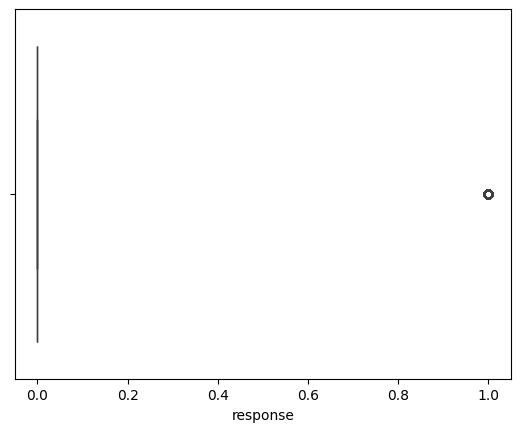

In [ ]:
#Plotting a boxplot to check the distributins of response column
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['response'])
plt.show()

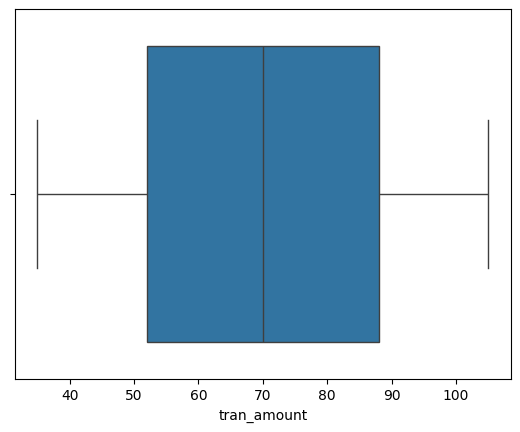

In [ ]:
# Analysing the outliers using box plot
sns.boxplot(x=df['tran_amount'])
plt.show()

In [ ]:
#creatimng new column
df['month']=df['trans_date'].dt.month
df

<ipython-input-22-9db1a94b587b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35.0,1,2
1,CS4768,2015-03-15,39.0,1,3
2,CS2122,2013-02-26,52.0,0,2
3,CS1217,2011-11-16,99.0,0,11
4,CS1850,2013-11-20,78.0,0,11
...,...,...,...,...,...
99456,CS5538,2013-09-13,62.0,0,9
99457,CS1486,2013-07-07,79.0,0,7
99458,CS4042,2015-01-05,76.0,0,1
99459,CS4199,2013-09-11,67.0,0,9


In [ ]:
#checking which  3 months have  highest transaction amounts ?
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,623168.0
1,10,622264.0
2,1,621158.0


In [ ]:
 #customers having highest numbers of orders
 customer_counts = df['customer_id'].value_counts().reset_index()
 customer_counts.columns=['customer_id','count']

 type(customer_counts)


pandas.core.frame.DataFrame

In [ ]:
top_5_order = customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_order

,customer_id,count
0,CS4320,38
1,CS4424,38
2,CS3013,35
3,CS3805,35
4,CS3799,35


<Axes: xlabel='customer_id', ylabel='count'>

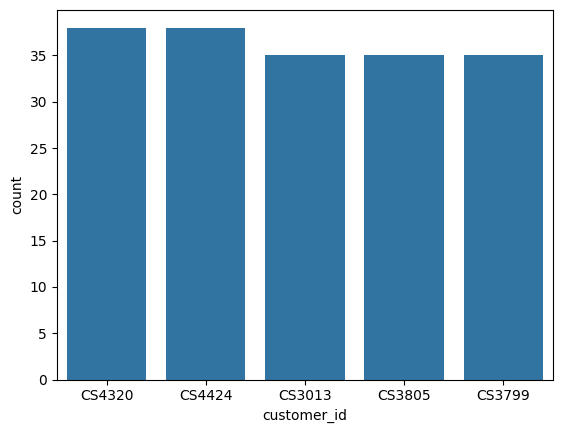

In [ ]:
#for better analysis : Plotting the barplot of top 5 Order(highest number of orders) with respect to their customer_id
sns.barplot(x='customer_id',y='count',data=top_5_order)

after analysing the above chart we could say that
customer with ID=CS4424 has bought maximum number of products with count **39** **bold text**

# **advance analytics **



In [ ]:
# TIME SERIES ANALYSIS OF DATA TO  FINDING TREND
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M') #Extracting Month and year from the trans_date column
df


<ipython-input-27-4ce2f5ba7a4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M') #Extracting Month and year from the trans_date column


,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35.0,1,2,2013-02
1,CS4768,2015-03-15,39.0,1,3,2015-03
2,CS2122,2013-02-26,52.0,0,2,2013-02
3,CS1217,2011-11-16,99.0,0,11,2011-11
4,CS1850,2013-11-20,78.0,0,11,2013-11
...,...,...,...,...,...,...
99456,CS5538,2013-09-13,62.0,0,9,2013-09
99457,CS1486,2013-07-07,79.0,0,7,2013-07
99458,CS4042,2015-01-05,76.0,0,1,2015-01
99459,CS4199,2013-09-11,67.0,0,9,2013-09


In [ ]:
monthly_sales=df.groupby('month_year')['tran_amount'].sum() # calculated the Total sales  amount with respect to month year
monthly_sales


month_year
2011-05     85375.0
2011-06    149103.0
2011-07    153650.0
2011-08    160881.0
2011-09    145356.0
2011-10    156985.0
2011-11    142672.0
2011-12    155437.0
2012-01    153074.0
2012-02    147151.0
2012-03    155268.0
2012-04    142581.0
2012-05    153579.0
2012-06    149247.0
2012-07    154389.0
2012-08    153829.0
2012-09    150513.0
2012-10    156247.0
2012-11    154777.0
2012-12    149744.0
2013-01    155454.0
2013-02    136322.0
2013-03    156253.0
2013-04    150338.0
2013-05    159164.0
2013-06    151799.0
2013-07    153838.0
2013-08    153957.0
2013-09    151014.0
2013-10    156144.0
2013-11    150489.0
2013-12    155197.0
2014-01    156610.0
2014-02    131893.0
2014-03    153306.0
2014-04    149373.0
2014-05    145929.0
2014-06    148236.0
2014-07    154932.0
2014-08    154501.0
2014-09    149287.0
2014-10    152888.0
2014-11    149702.0
2014-12    149180.0
2015-01    156020.0
2015-02    137475.0
2015-03     81678.0
Freq: M, Name: tran_amount, dtype: float64

In [ ]:
# to plot line plot we have to convert the monthly sales index to timestamp
monthly_sales.index=monthly_sales.index.to_timestamp()
monthly_sales.index

DatetimeIndex(['2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01'],
              dtype='datetime64[ns]', name='month_year', freq='MS')

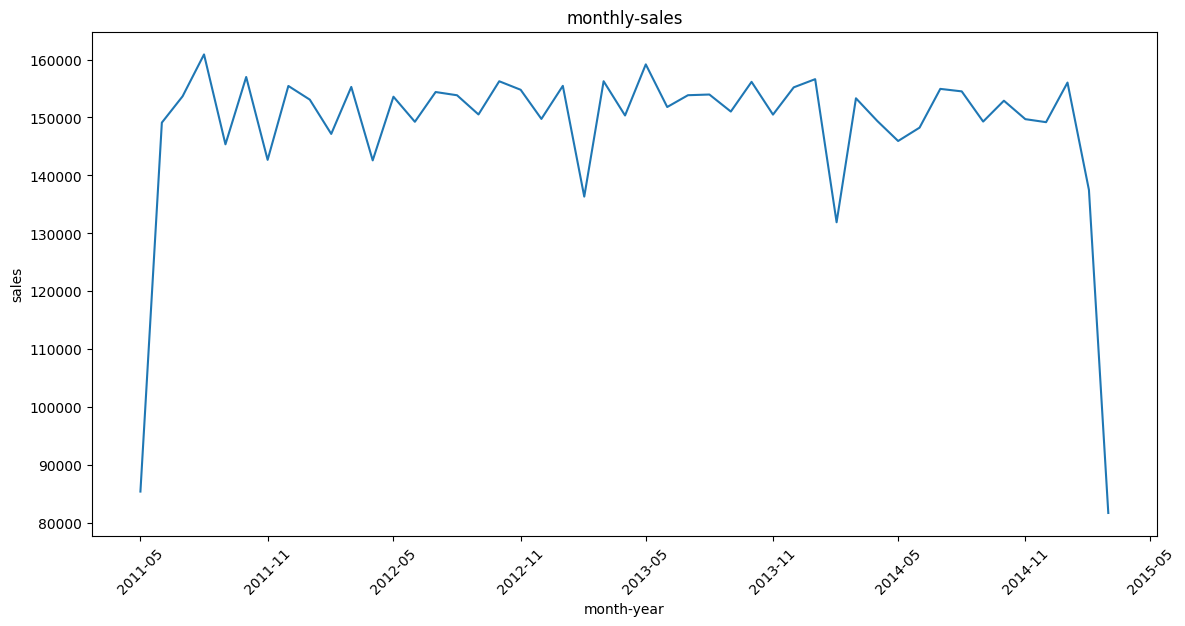

In [ ]:
#plotted a Line plot to find the trend of the Monthly sales
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #changed the format of the data for better visual understanding
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval =6))
plt.xlabel('month-year')
plt.ylabel('sales')
plt.title('monthly-sales')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


After analysing the above plot:
we could say that,


*   the maximum sales is between may 2011 and november 2011 which is above 180000
*  the minimum sales is between november 2013 and May 2014 which is around 150000




cohort segmentation

grouping the customer according to different parameters like;

 recency , frequency count with respect to transaction date

 monetory with respect to transaction amount
**bold text**


In [ ]:
recency=df.groupby('customer_id')['trans_date'].max()
frequency=df.groupby('customer_id')['trans_date'].count()
monetory=df.groupby('customer_id')['tran_amount'].sum()
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetory':monetory})
rfm

,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012.0
CS1113,2015-02-09,20,1490.0
CS1114,2015-02-12,19,1432.0
CS1115,2015-03-05,22,1659.0
CS1116,2014-08-25,13,857.0
...,...,...,...
CS6107,2015-01-03,17,1327.0
CS6108,2014-11-07,21,1348.0
CS6109,2014-01-30,17,1071.0


In [ ]:
#customer_segmenatation
def customer_seg(row):
  if row['recency'].year>=2012 and row['frequency']>=15 and row['monetory']>1000:
    return('P0')
  elif 2011<row['recency'].year<2012 and 10<row['frequency']<15 and 500<row['monetory']<=1000:
    return('P1')
  else:
    return('P2')
rfm['segment']=rfm.apply(customer_seg,axis=1)
rfm

,recency,frequency,monetory,segment
customer_id,,,,
CS1112,2015-01-14,15,1012.0,P0
CS1113,2015-02-09,20,1490.0,P0
CS1114,2015-02-12,19,1432.0,P0
CS1115,2015-03-05,22,1659.0,P0
CS1116,2014-08-25,13,857.0,P2
...,...,...,...,...
CS6107,2015-01-03,17,1327.0,P0
CS6108,2014-11-07,21,1348.0,P0
CS6109,2014-01-30,17,1071.0,P0


churn analysis : how the business is performing


In [ ]:
#count the number of churned and active customers
churn_cust=df['response'].value_counts()
churn_cust


0    86484
1    12977
Name: response, dtype: int64

<Axes: >

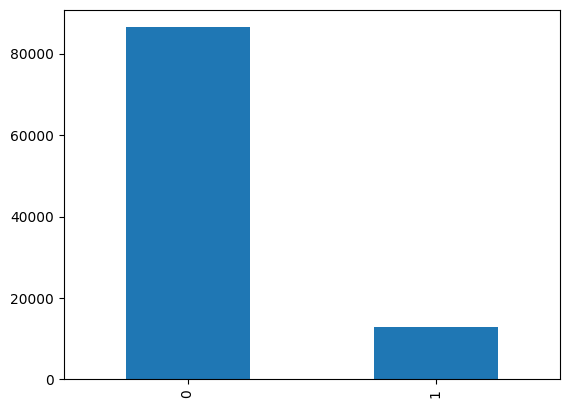

In [ ]:
churn_cust.plot(kind='bar')

After analyzing the above plot
we could say that the churning customers are moe in Numbers

for Better insights we have gruoped top 5 customners with highest Monetory to confirm that the customers who have given negative feedback have churned out .

In [ ]:
top_5_cus=monetory.sort_values(ascending=False).head(5).index
top_cust_df=df[df['customer_id'].isin(top_5_cus)]
top_cust_df

,customer_id,trans_date,tran_amount,response,month,month_year
110,CS4320,2014-04-09,52.0,1,4,2014-04
411,CS4424,2013-05-16,82.0,0,5,2013-05
1010,CS4074,2011-07-23,81.0,0,7,2011-07
1987,CS4660,2011-07-07,86.0,0,7,2011-07
2100,CS4320,2011-07-23,67.0,1,7,2011-07
...,...,...,...,...,...,...
96015,CS4074,2013-11-03,47.0,0,11,2013-11
96429,CS4074,2011-07-08,90.0,0,7,2011-07
96871,CS4660,2012-06-02,39.0,0,6,2012-06
98506,CS5752,2013-10-01,90.0,0,10,2013-10


<Axes: xlabel='month_year'>

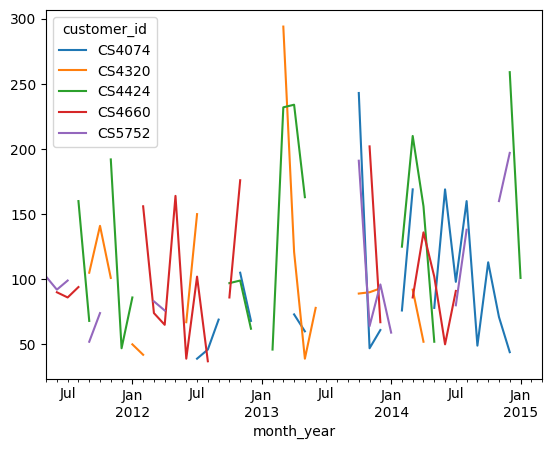

In [ ]:
top_cust_sales=top_cust_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_cust_sales.plot(kind='line')

In [ ]:
df.to_csv('/content/drive/My Drive/main.csv')
rfm.to_csv('/content/drive/My Drive/addAnalysis.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35.0,1,2,2013-02
1,CS4768,2015-03-15,39.0,1,3,2015-03
2,CS2122,2013-02-26,52.0,0,2,2013-02
3,CS1217,2011-11-16,99.0,0,11,2011-11
4,CS1850,2013-11-20,78.0,0,11,2013-11
...,...,...,...,...,...,...
99456,CS5538,2013-09-13,62.0,0,9,2013-09
99457,CS1486,2013-07-07,79.0,0,7,2013-07
99458,CS4042,2015-01-05,76.0,0,1,2015-01
99459,CS4199,2013-09-11,67.0,0,9,2013-09


In [ ]:
rfm

,recency,frequency,monetory,segment
customer_id,,,,
CS1112,2015-01-14,15,1012.0,P0
CS1113,2015-02-09,20,1490.0,P0
CS1114,2015-02-12,19,1432.0,P0
CS1115,2015-03-05,22,1659.0,P0
CS1116,2014-08-25,13,857.0,P2
...,...,...,...,...
CS6107,2015-01-03,17,1327.0,P0
CS6108,2014-11-07,21,1348.0,P0
CS6109,2014-01-30,17,1071.0,P0


In [ ]:
main=pd.read_csv('/content/drive/MyDrive/main.csv')
main

,Unnamed: 0,customer_id,trans_date,tran_amount,response,month,month_year
0,0,CS5295,2013-02-11,35.0,1,2,2013-02
1,1,CS4768,2015-03-15,39.0,1,3,2015-03
2,2,CS2122,2013-02-26,52.0,0,2,2013-02
3,3,CS1217,2011-11-16,99.0,0,11,2011-11
4,4,CS1850,2013-11-20,78.0,0,11,2013-11
...,...,...,...,...,...,...,...
99456,99456,CS5538,2013-09-13,62.0,0,9,2013-09
99457,99457,CS1486,2013-07-07,79.0,0,7,2013-07
99458,99458,CS4042,2015-01-05,76.0,0,1,2015-01
99459,99459,CS4199,2013-09-11,67.0,0,9,2013-09


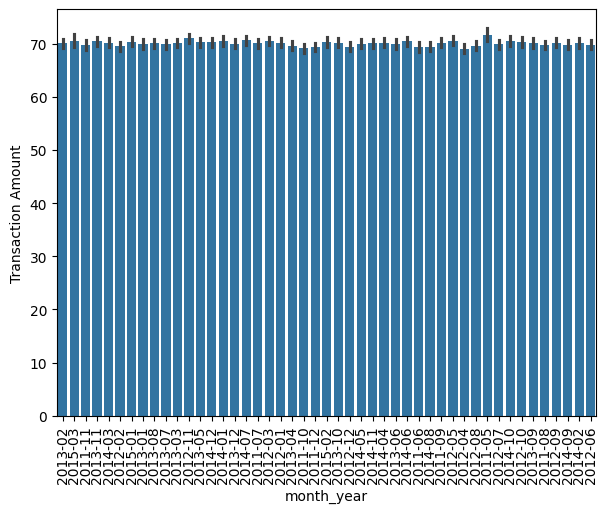

In [ ]:

# Set x-axis and y-axis labels
plt.xlabel('month_year')
plt.ylabel('Transaction Amount')
sns.barplot(x='month_year', y='tran_amount', data=main)
plt.tight_layout()
plt.xticks(rotation=90)
# Show the plot
plt.show()


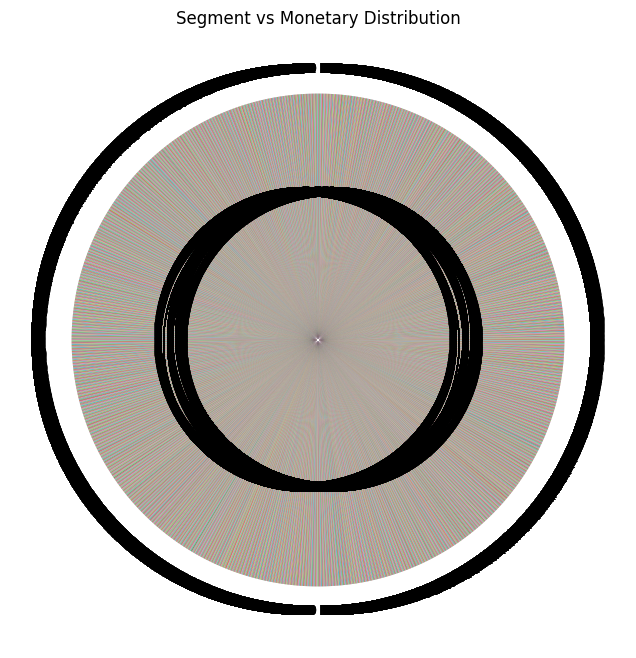

In [ ]:
analyse=pd.read_csv('/content/drive/MyDrive/addAnalysis.csv')
analyse['monetory'] = pd.to_numeric(analyse['monetory'])
analyse
pie_plot_df = pd.DataFrame({
    'segment': analyse['segment'],
    'monetory': analyse['monetory']
})

# Plot the pie chart
plt.figure(figsize=(15, 8))
plt.pie(pie_plot_df['monetory'], labels=pie_plot_df['segment'], autopct="%1.1f%%")
plt.title('Segment vs Monetary Distribution')
plt.show()

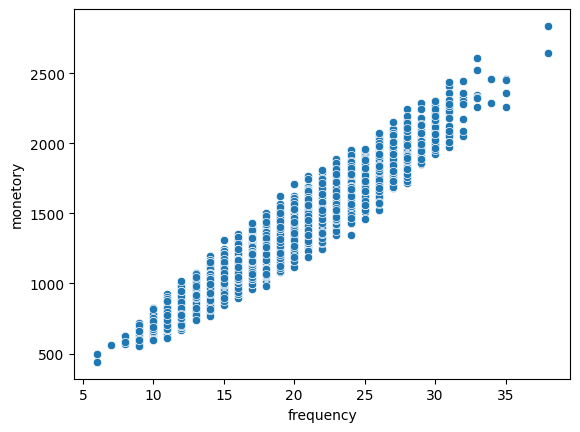

In [ ]:
sns.scatterplot(x='frequency',y='monetory',data=analyse)
plt.show()

above scatter plot indicates that

along with increase in the Frequency the Monetory is also increasing